# 5.설명 가능한 CNN
- 특성 맵 시각화

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(100,100,3), activation='relu',
                           kernel_size=(5,5), filters=32),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(activation='relu', kernel_size=(5,5), filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 64)         

In [ ]:
# 특성 맵 정의
# 특성 맵은 합성곱층을 입력 이미지와 필터를 연산하여 얻은 결과

ins = model.inputs
print(ins)

outs = model.layers[0].output
print(outs)

feature_map = Model(inputs = ins, outputs = outs)
feature_map.summary()

[<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'conv2d_input')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 96, 96, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 96, 96, 32)        2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________


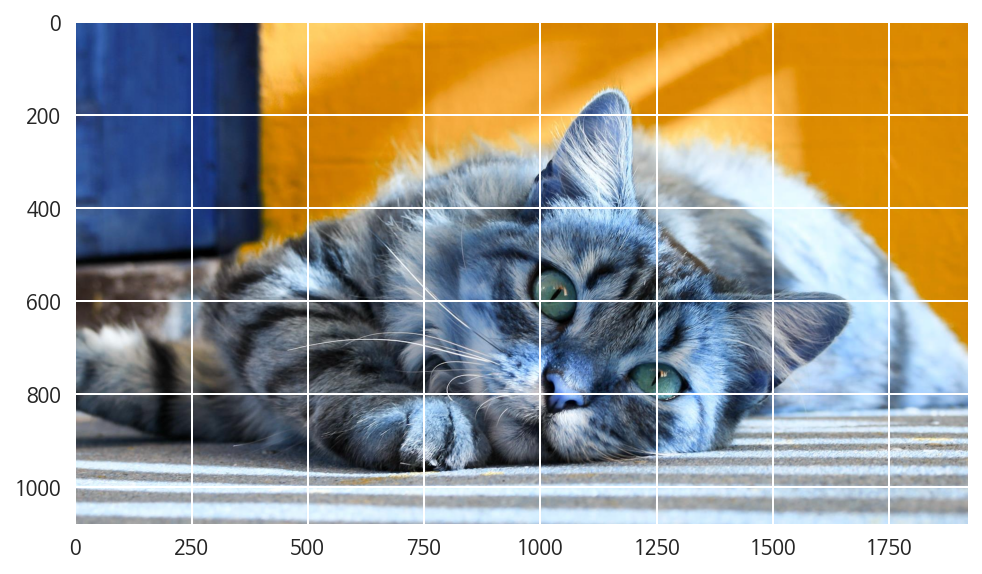

In [ ]:
# 이미지 로드
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/cat.jpg')
plt.imshow(img)

(100, 100, 3)
(1, 100, 100, 3)
(1, 96, 96, 32)


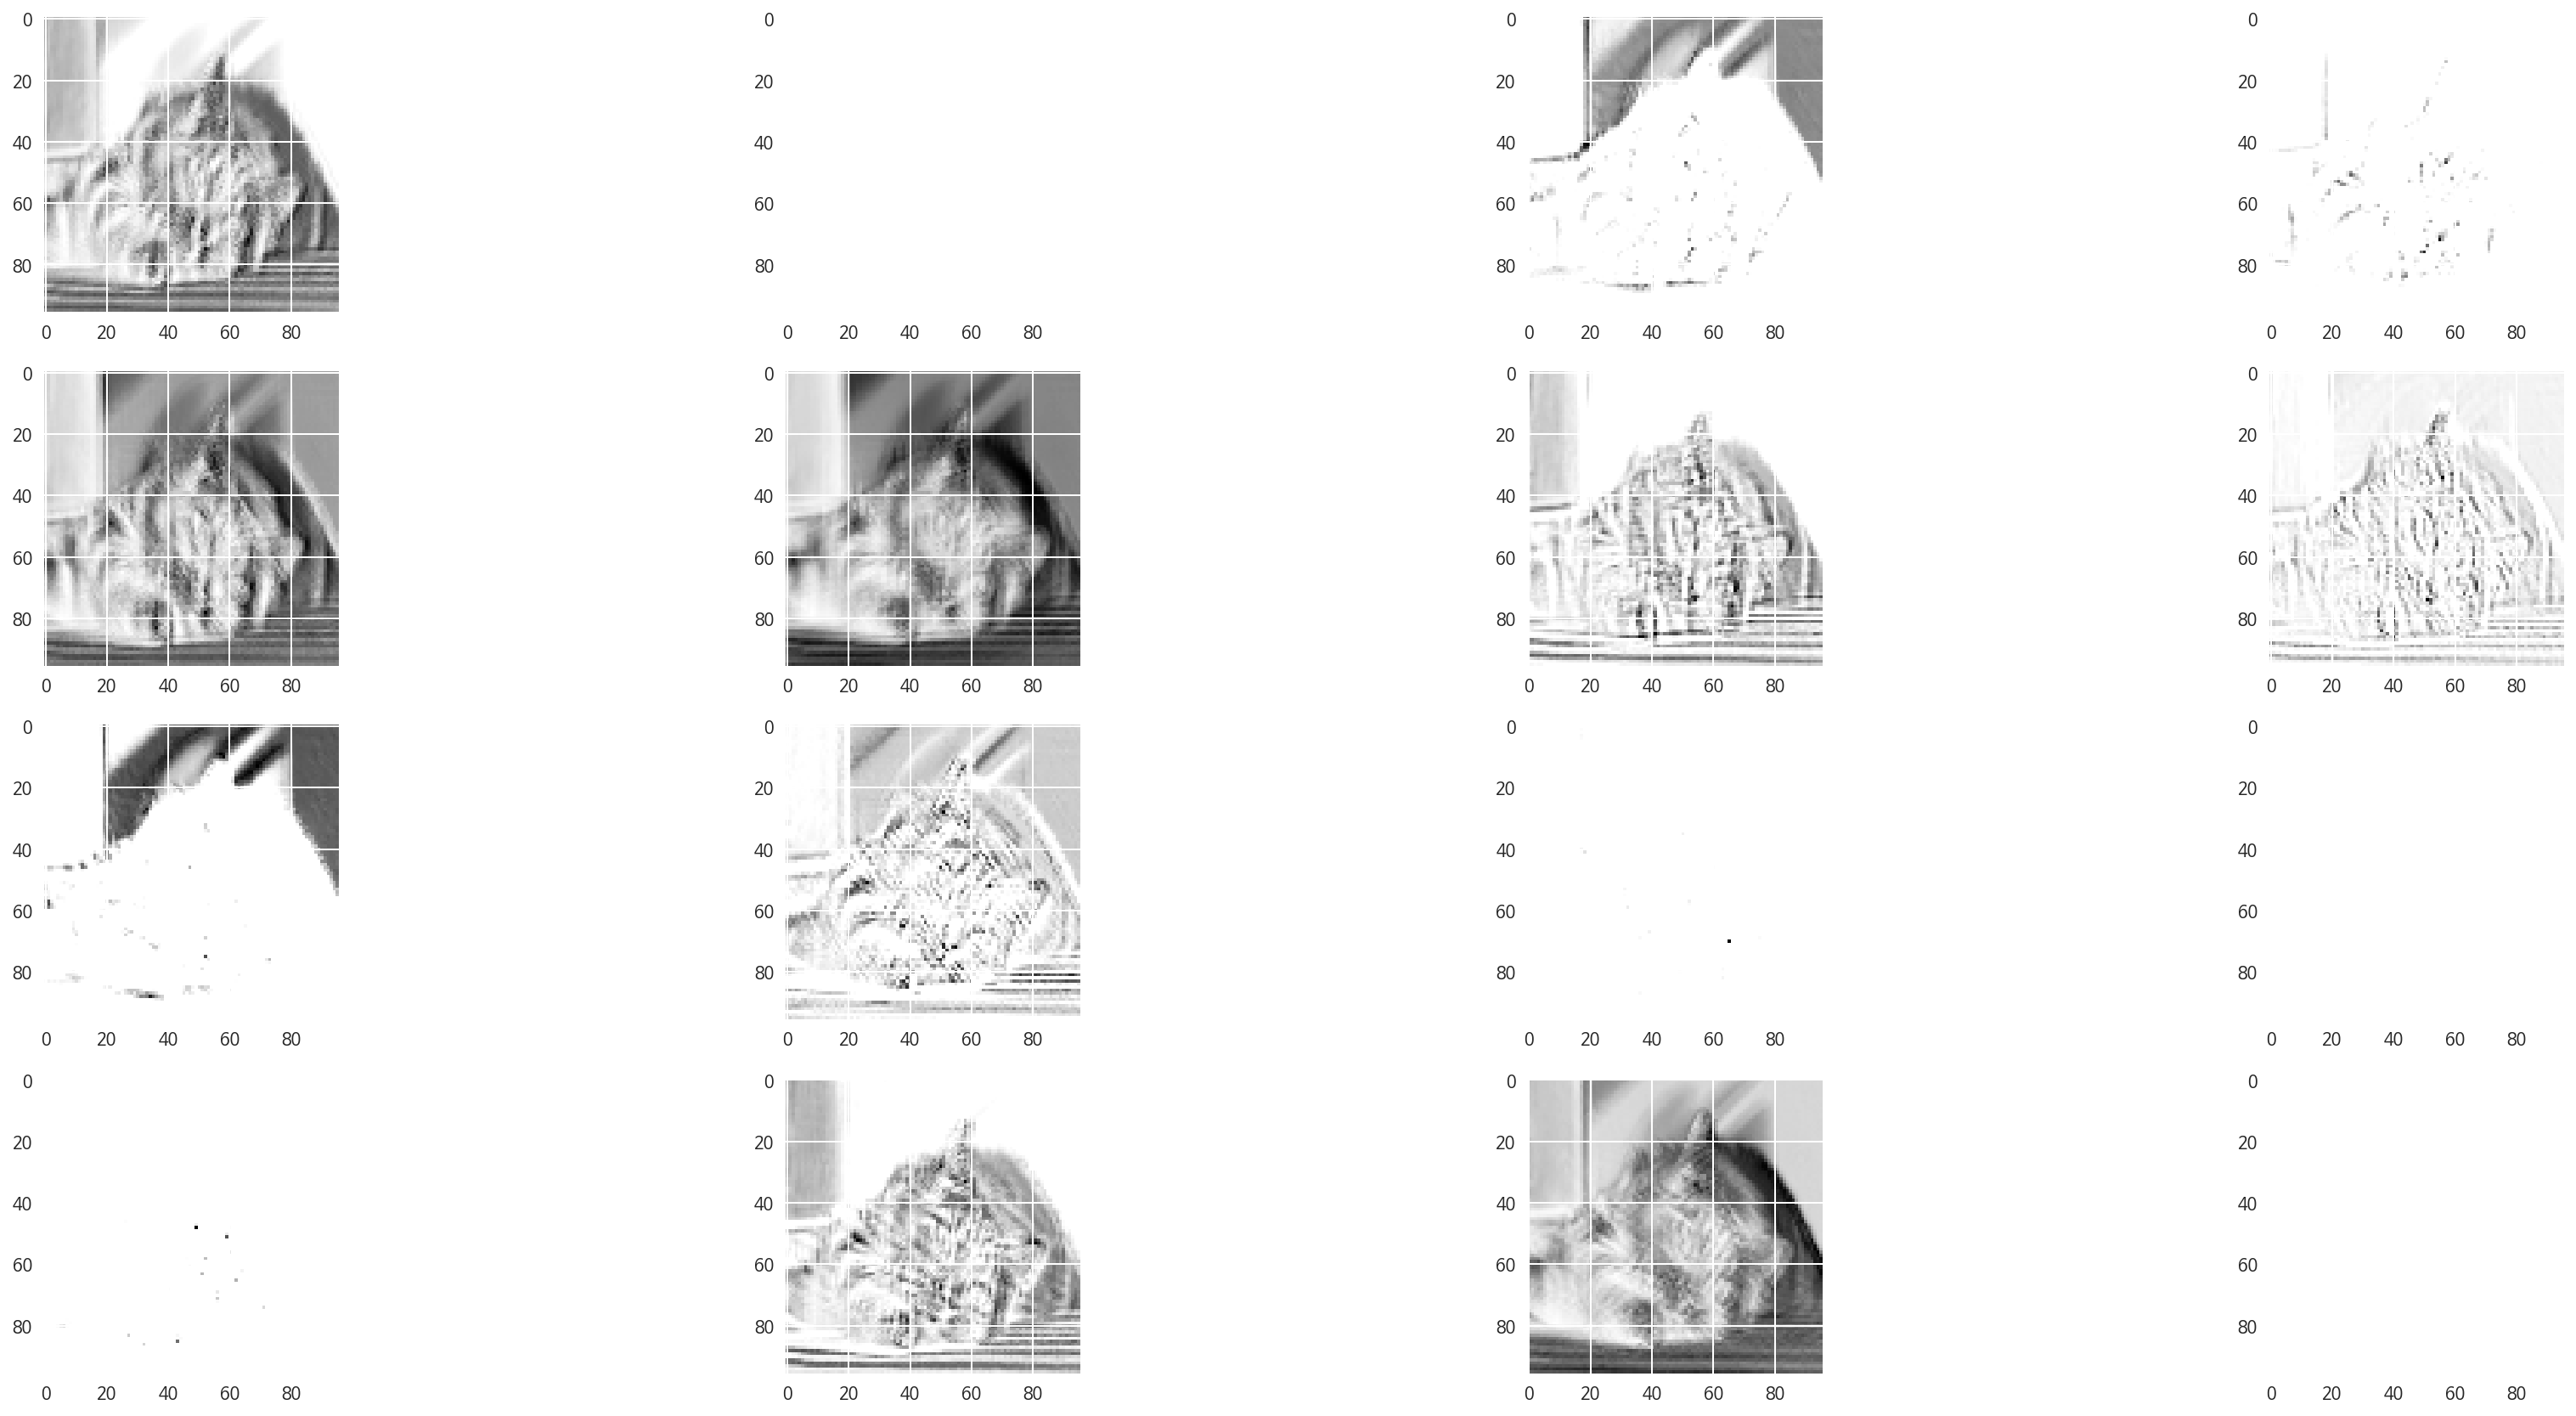

In [ ]:
# 이미지 전처리 후 특성 맵 확인
img = cv2.resize(img, (100, 100))
print(img.shape)
input_img = np.expand_dims(img, axis = 0)
print(input_img.shape)

feature = feature_map.predict(input_img)
print(feature.shape)

fig = plt.figure(figsize = (30 ,30))
for i in range(16):
  ax = fig.add_subplot(8, 4, i+ 1)
  ax.imshow(feature[0,:,:,i])

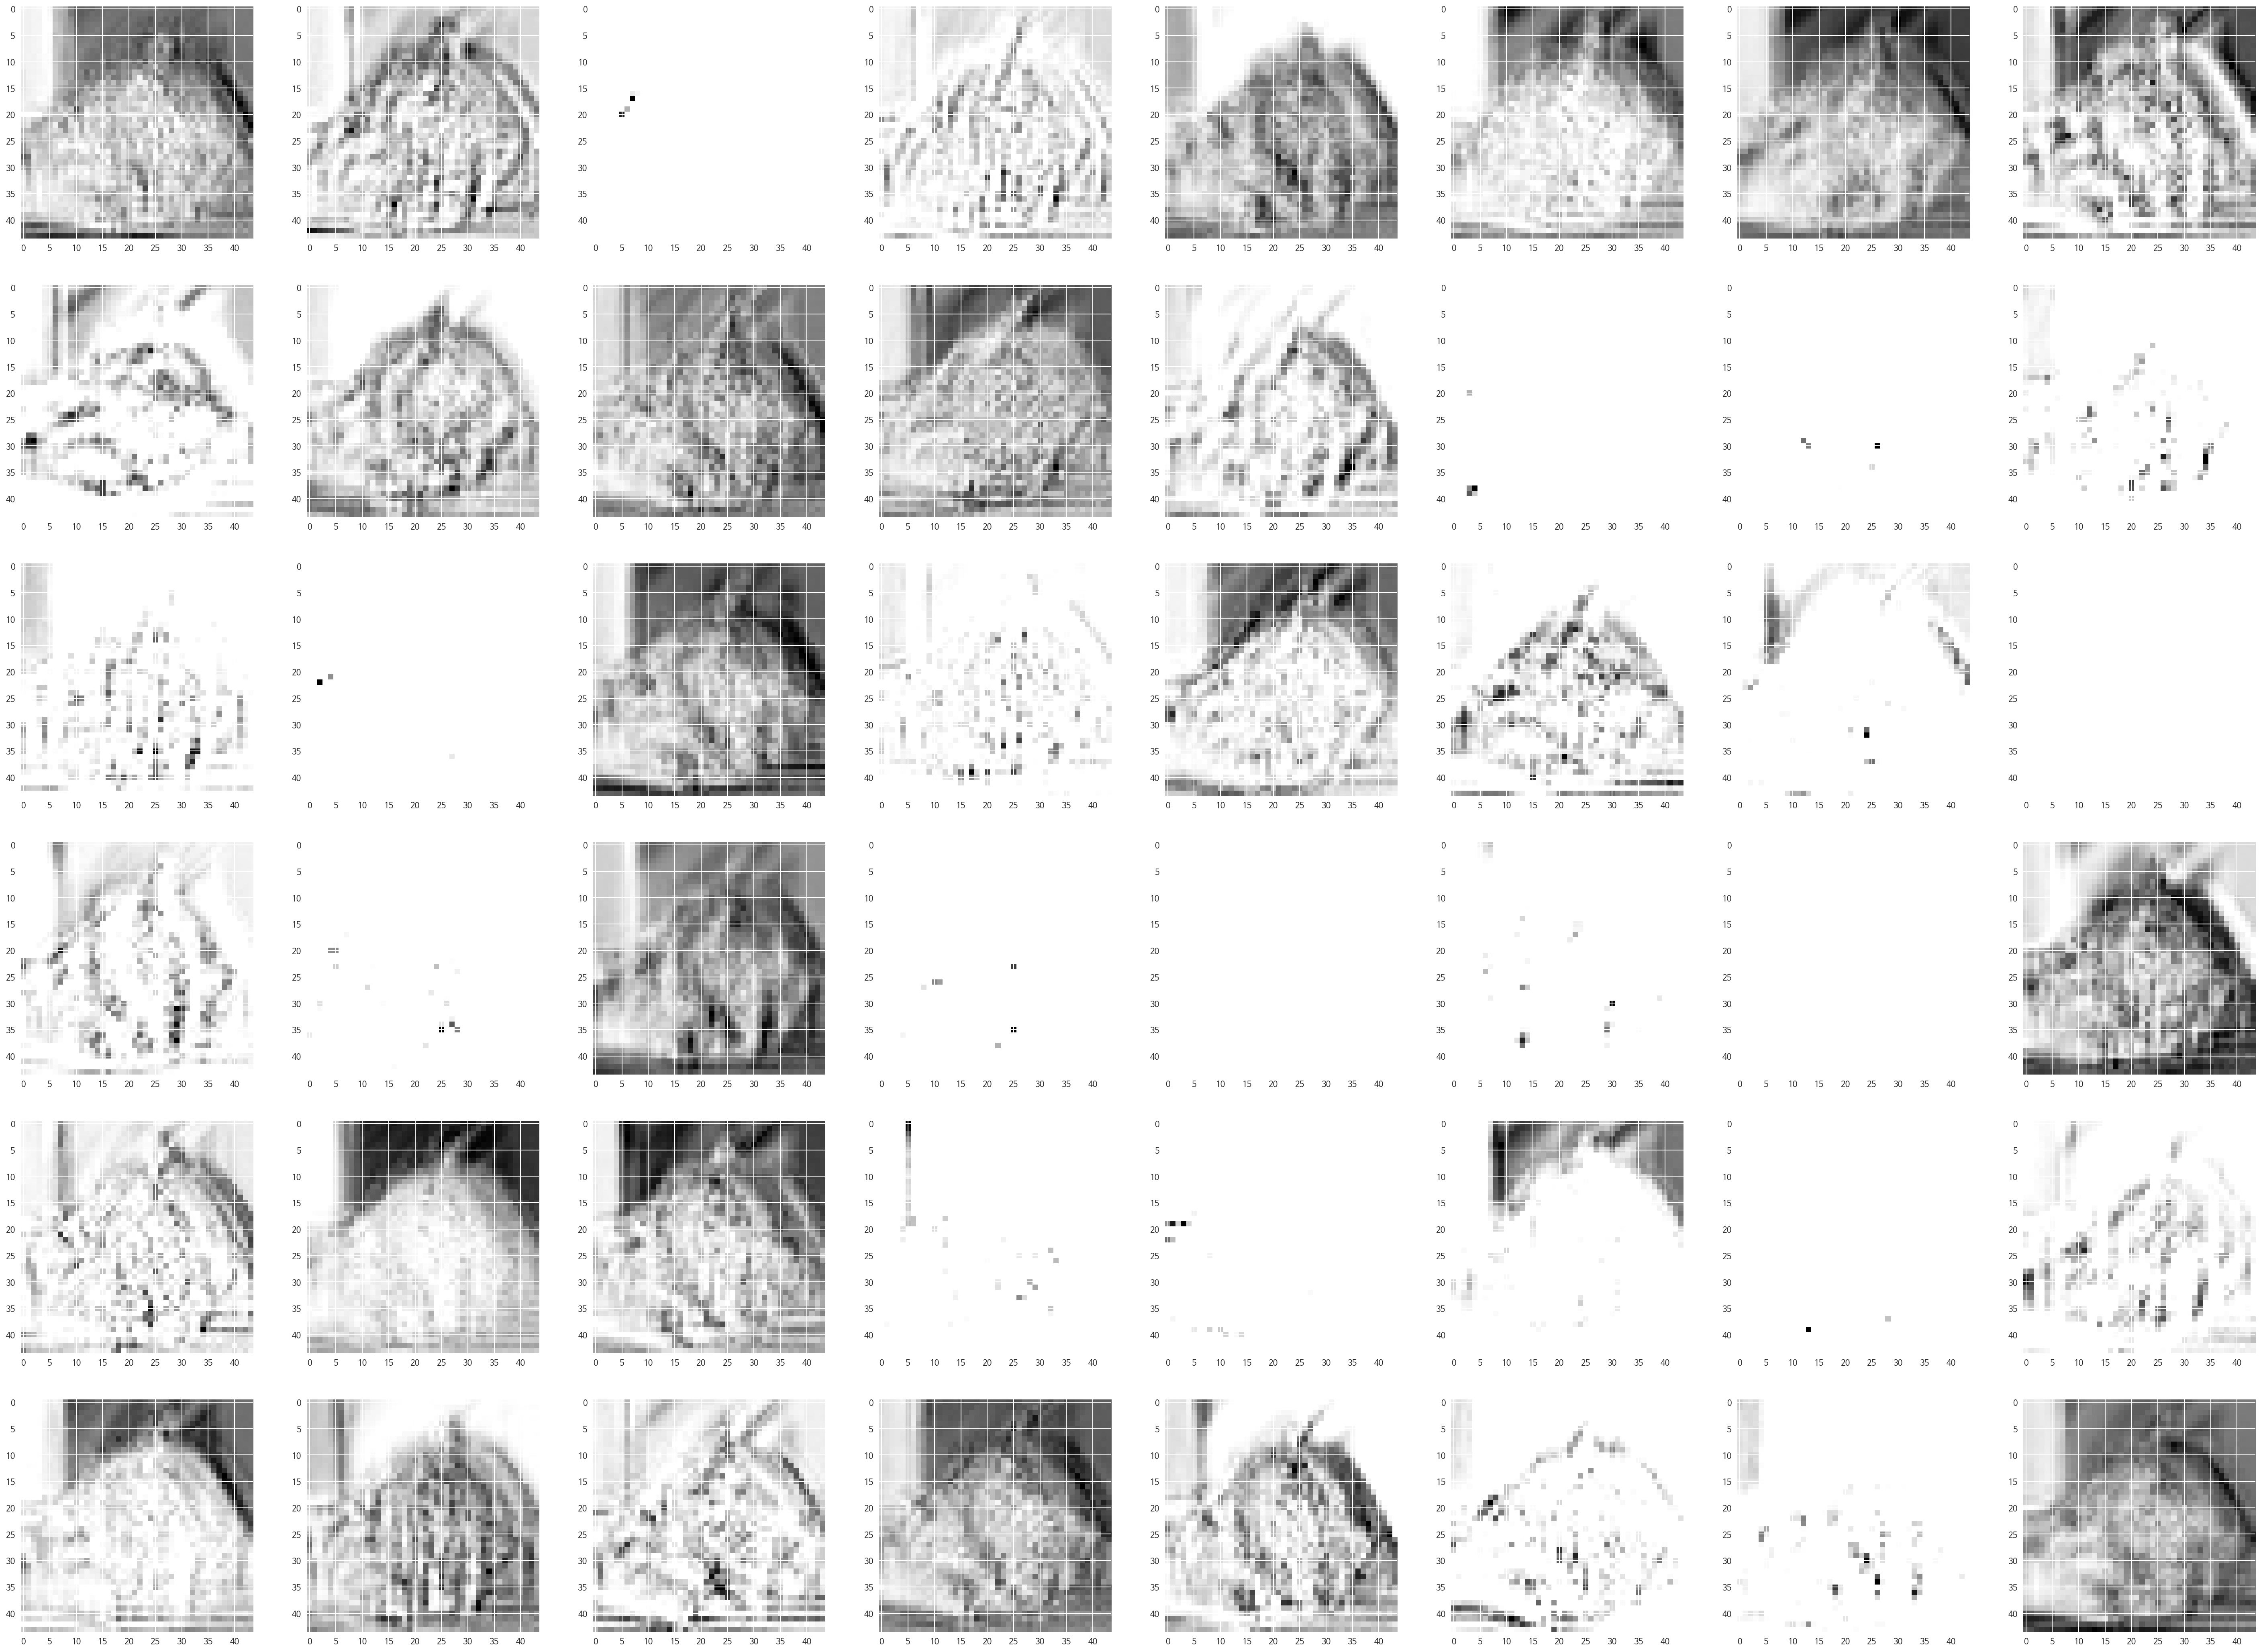

In [ ]:
# 2번쨰 계층
ins = model.inputs
outs = model.layers[2].output
feature_map = Model(inputs=ins, outputs=outs)
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/cat.jpg')
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50,50))
for i in range(48):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0,:,:,i])

In [ ]:
 model.layers[2].output

<KerasTensor: shape=(None, 44, 44, 64) dtype=float32 (created by layer 'conv2d_1')>

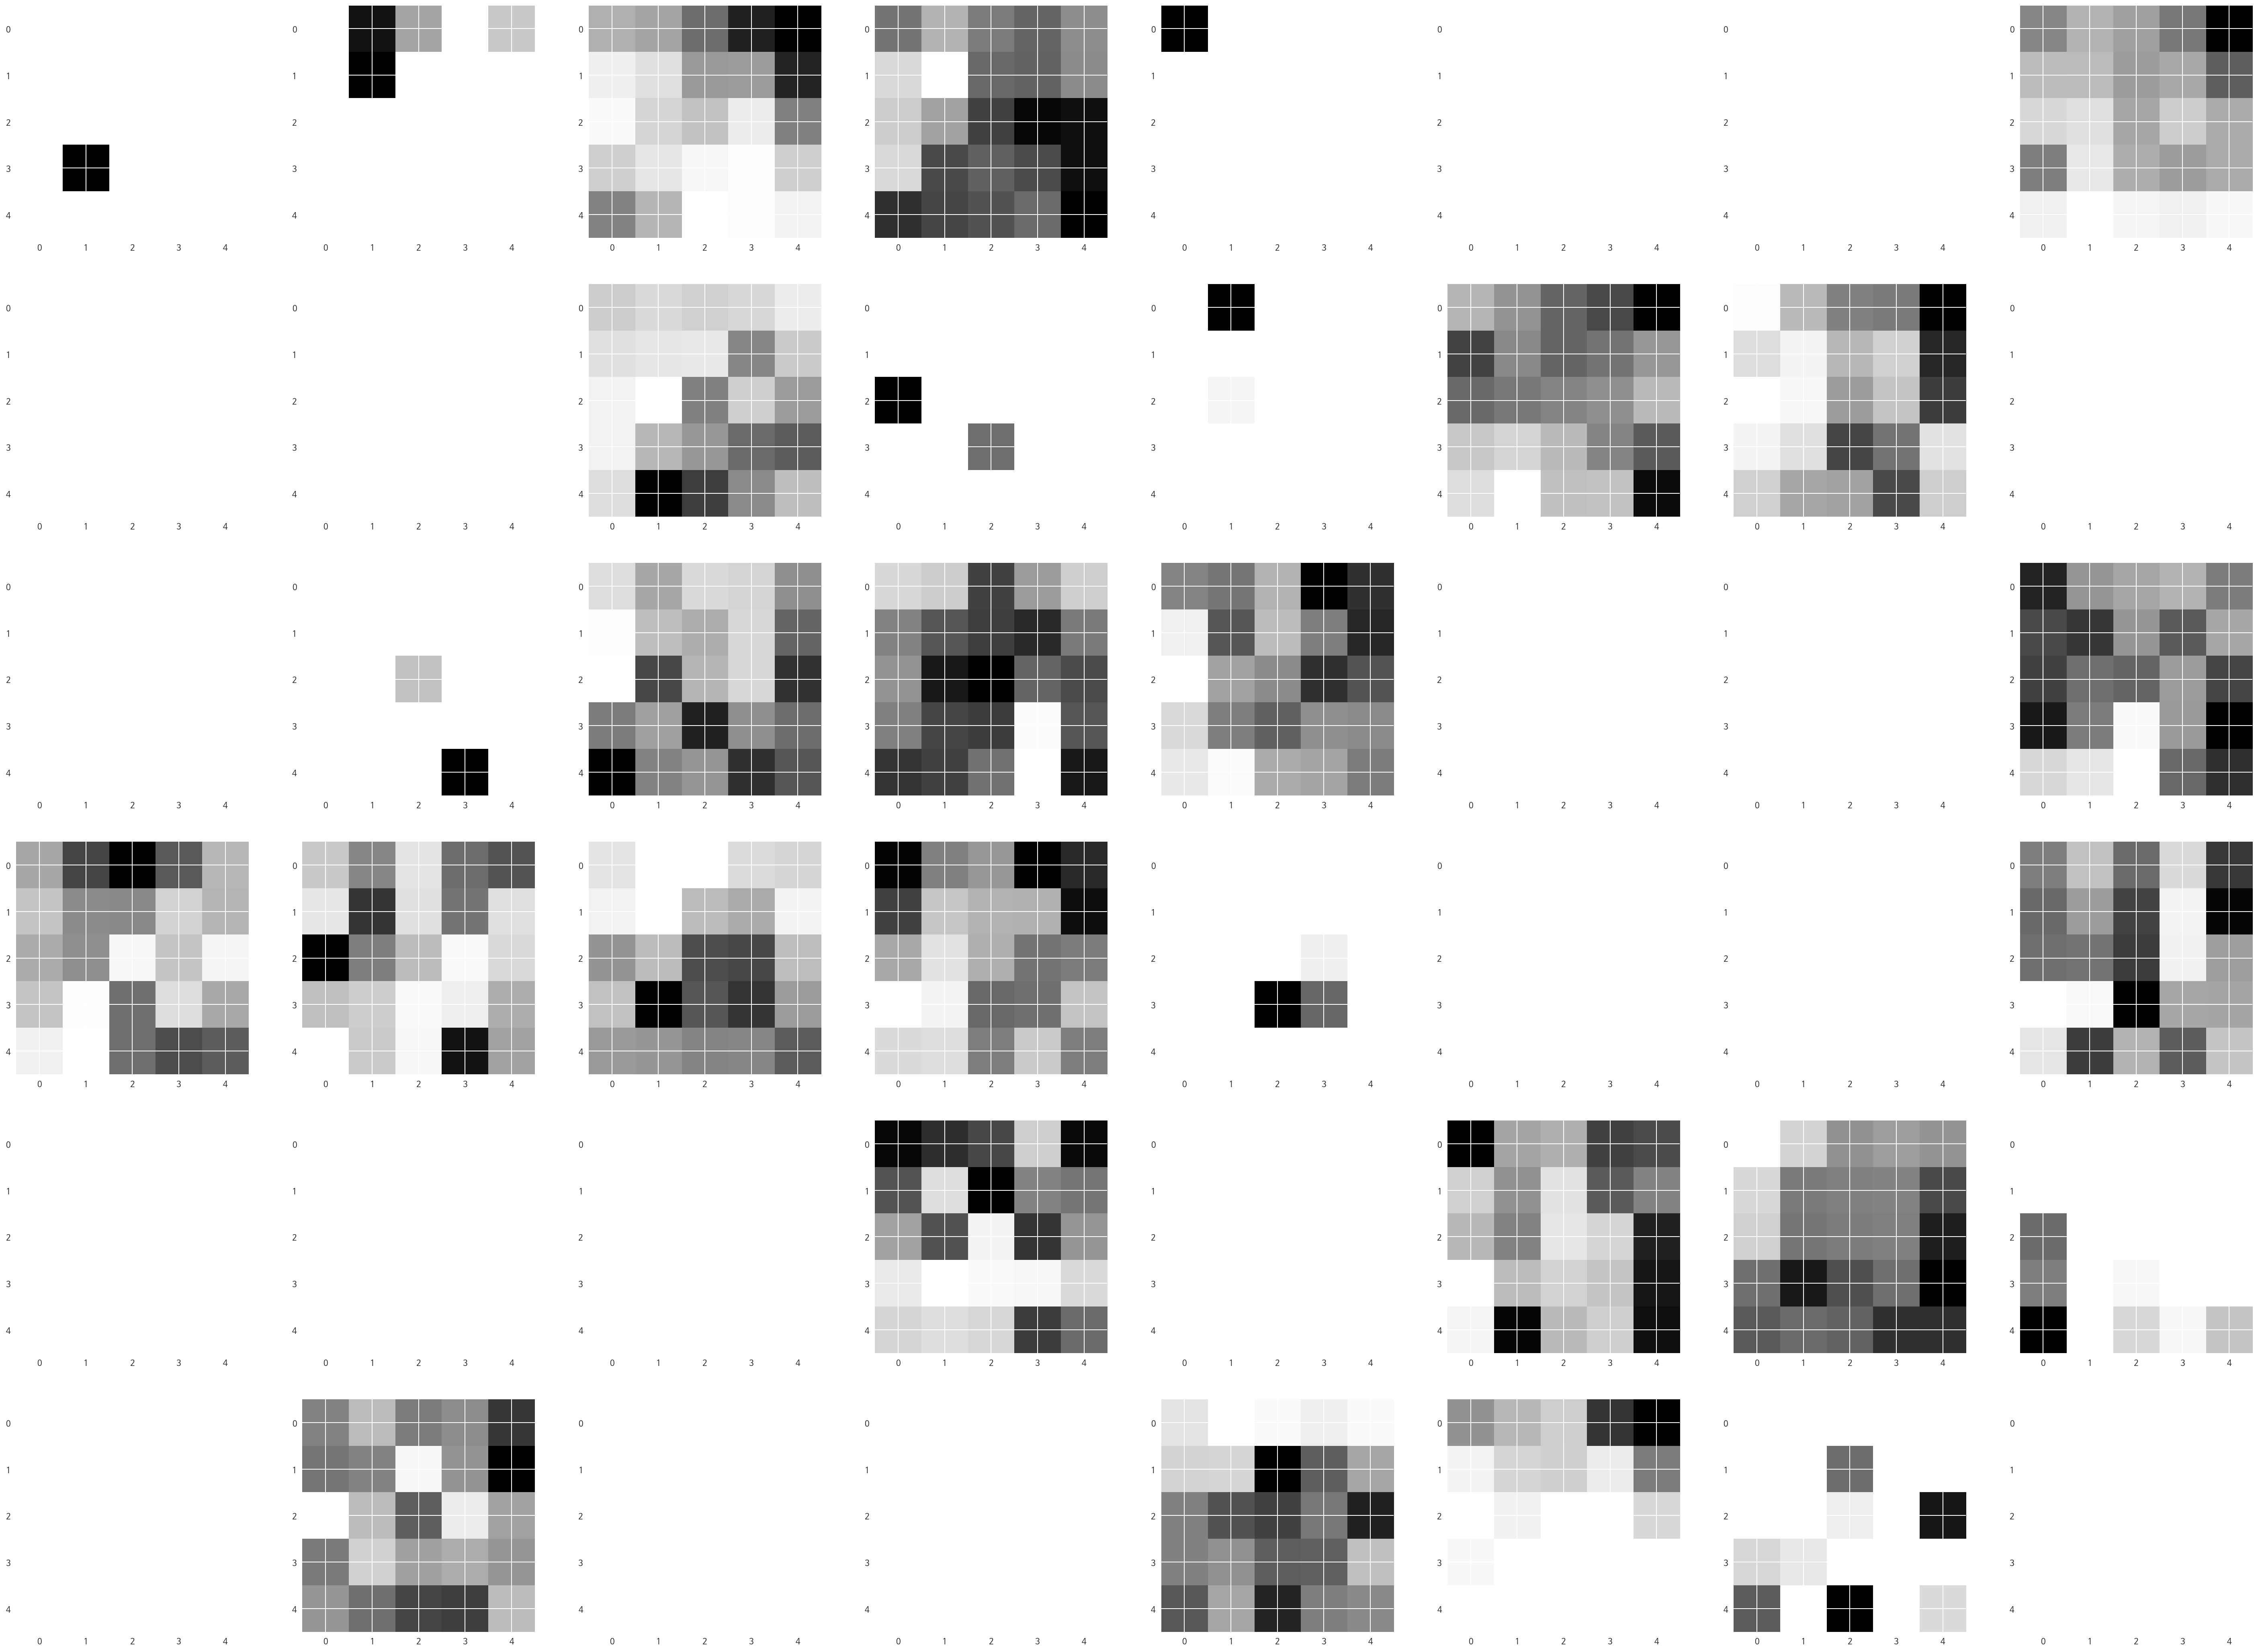

In [ ]:
# 6번쨰 계층
ins = model.inputs
outs = model.layers[6].output
feature_map = Model(inputs=ins, outputs=outs)

img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/cat.jpg')
img = cv2.resize(img, (100,100))
input_img = np.expand_dims(img, axis=0)

feature = feature_map.predict(input_img)
fig = plt.figure(figsize=(50,50))
for i in range(48):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(feature[0,:,:,i])